In [71]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pyperclip
import json
import datetime 

In [72]:
# Adjust Jupyter Display Settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display all columns and rows
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Remove Scientific Notation and Display options to only 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Remove Deprecation Warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Remove Future Deprecation Warnings
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [73]:
# read in crypto prices
BTC = pd.read_excel("Crypto Prices.xlsx", sheet_name = "Bitcoin")
ETH = pd.read_excel("Crypto Prices.xlsx", sheet_name = "Ethereum")
SOL = pd.read_excel("Crypto Prices.xlsx", sheet_name = "Solana")

SOL

,Date,Crypto,Open,High,Low,Close,Volume,Market Cap
0,2022-09-30,SOL,33.950,35.130,32.740,33.210,1210784941,11787522154
1,2022-09-29,SOL,33.240,34.340,32.790,33.950,951223921,12050180083
2,2022-09-28,SOL,32.740,33.740,31.730,33.240,998520503,11791307084
3,2022-09-27,SOL,33.880,35.240,32.270,32.750,1223724195,11619152544
4,2022-09-26,SOL,32.340,33.880,31.960,33.880,936313674,12020234575
...,...,...,...,...,...,...,...,...
360,2021-10-05,SOL,166.990,169.980,160.590,164.120,2541087419,48902559644
361,2021-10-04,SOL,172.960,172.960,162.770,166.730,3109040100,49659370563
362,2021-10-03,SOL,169.110,176.970,166.070,172.590,3149579954,51403969859
363,2021-10-02,SOL,161.590,174.900,156.320,169.090,3471658582,50362758463


In [74]:
# read in US Dollar/Euro foreign exchange rates
EUxUSD = pd.read_excel("DEXUSEU.xls")
EUxUSD

,Date,DEXUSEU
0,2021-10-01,1.160
1,2021-10-04,1.162
2,2021-10-05,1.161
3,2021-10-06,1.155
4,2021-10-07,1.156
...,...,...
256,2022-09-26,0.962
257,2022-09-27,0.962
258,2022-09-28,0.968
259,2022-09-29,0.977


In [75]:
df = BTC[['Date','Close']].merge(ETH[['Date','Close']], on='Date', how='inner'
                                ).merge(SOL[['Date','Close']], on='Date', how='inner'
                                       ).merge(EUxUSD[['Date','DEXUSEU']], on='Date', how='inner'
                                              ).rename(columns={'Close_x':'BTC', 'Close_y':'ETH', 'Close':'SOL'})
df

,Date,BTC,ETH,SOL,DEXUSEU
0,2022-09-30,19431.790,1327.980,33.210,0.978
1,2022-09-29,19573.050,1335.650,33.950,0.977
2,2022-09-28,19426.720,1337.410,33.240,0.968
3,2022-09-27,19110.550,1330.130,32.750,0.962
4,2022-09-26,19222.670,1335.320,33.880,0.962
...,...,...,...,...,...
256,2021-10-07,53805.990,3587.970,154.280,1.156
257,2021-10-06,55361.450,3580.560,154.110,1.155
258,2021-10-05,51514.810,3518.520,164.120,1.161
259,2021-10-04,49112.900,3380.090,166.730,1.162


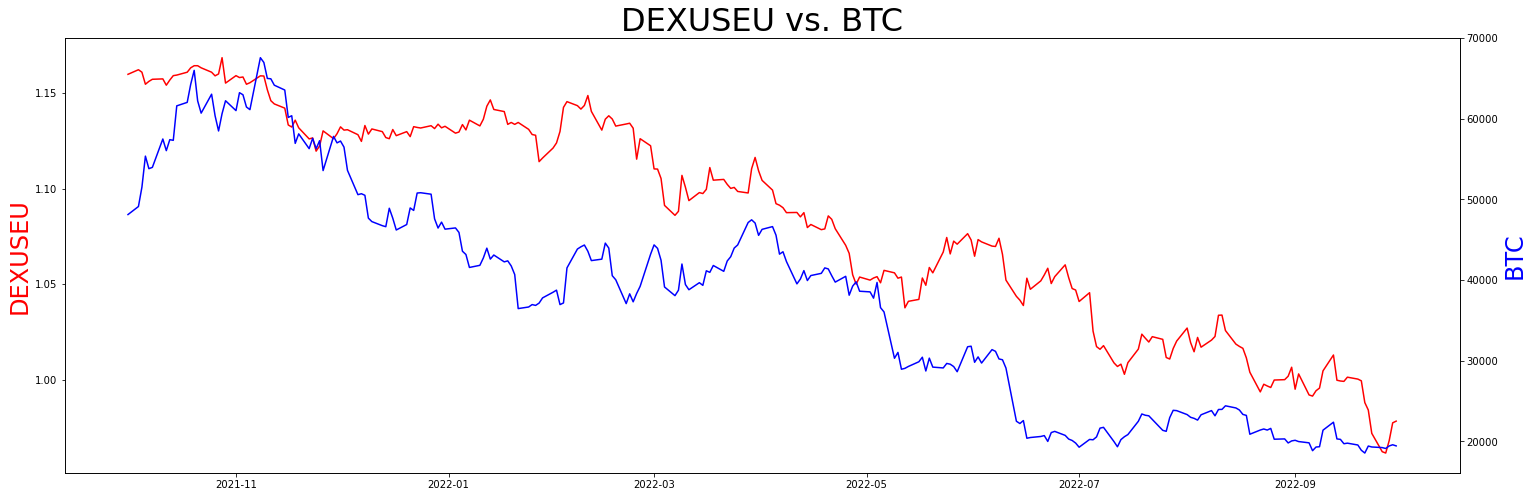

In [76]:
# DEXUSEU vs BTC
fig, ax1 = plt.subplots(figsize=(25,8));

ax2 = ax1.twinx();
ax1.plot(df['Date'], df['DEXUSEU'], 'r');
ax2.plot(df['Date'], df['BTC'], 'b');

ax1.set_title('DEXUSEU vs. BTC', fontsize=32)
ax1.set_ylabel('DEXUSEU', fontsize=24, color='r');
ax2.set_ylabel('BTC', fontsize=24, color='b');

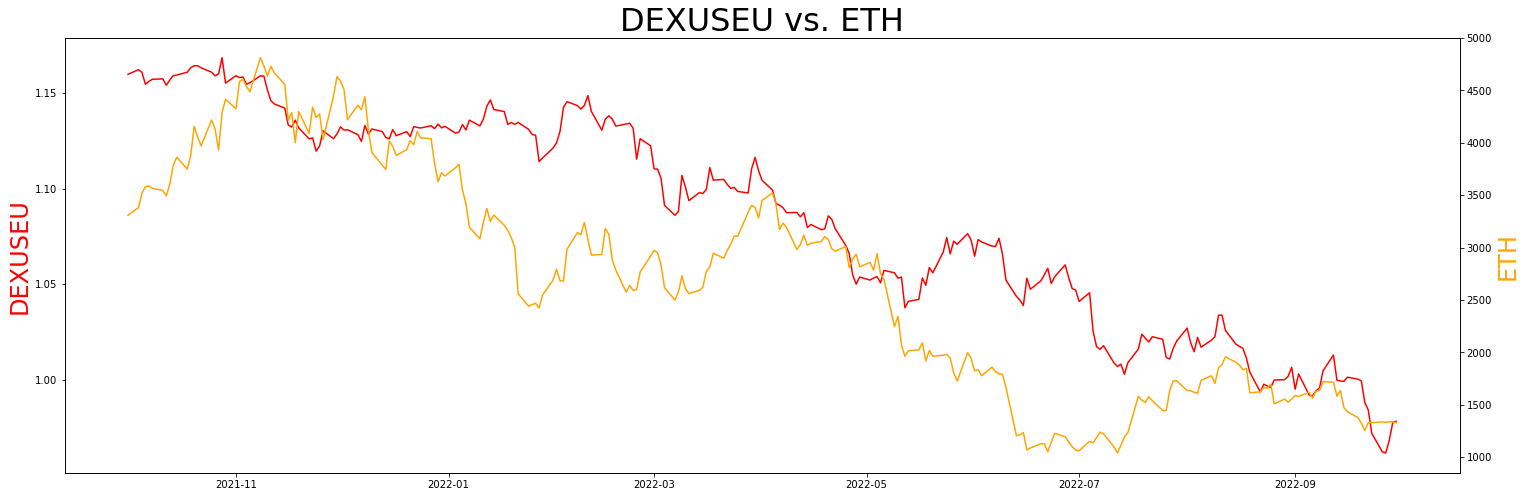

In [77]:
# DEXUSEU vs ETH
fig, ax1 = plt.subplots(figsize=(25,8));

ax2 = ax1.twinx();
ax1.plot(df['Date'], df['DEXUSEU'], 'r');
ax2.plot(df['Date'], df['ETH'], 'orange');

ax1.set_title('DEXUSEU vs. ETH', fontsize=32)
ax1.set_ylabel('DEXUSEU', fontsize=24, color='r');
ax2.set_ylabel('ETH', fontsize=24, color='orange');

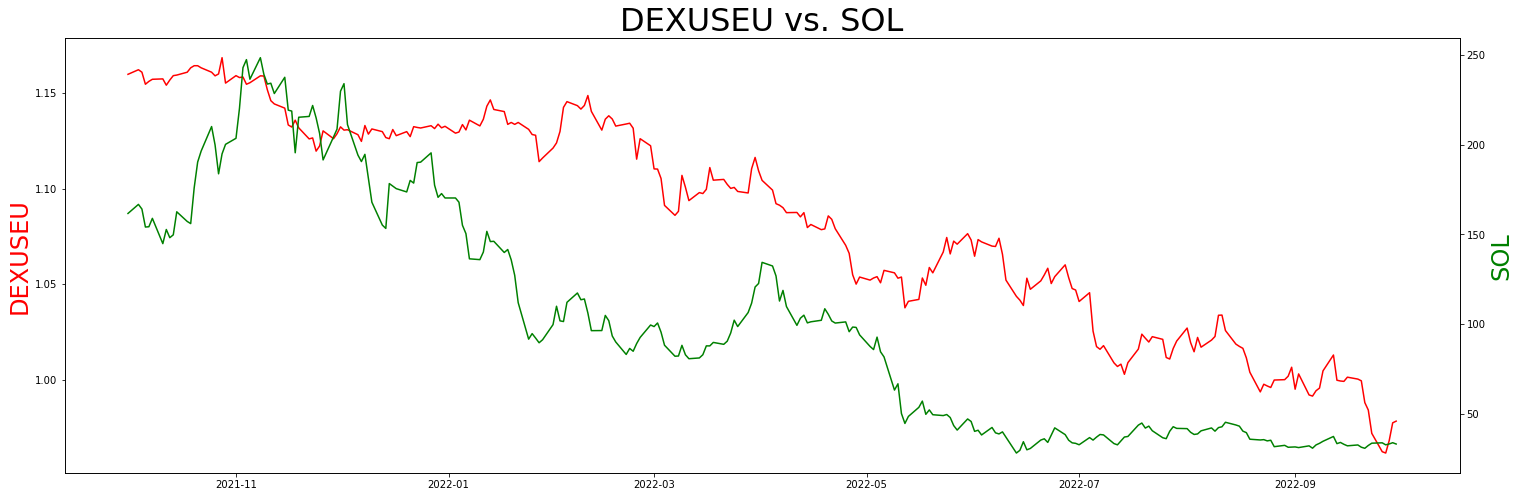

In [78]:
# DEXUSEU vs SOL
fig, ax1 = plt.subplots(figsize=(25,8));

ax2 = ax1.twinx();
ax1.plot(df['Date'], df['DEXUSEU'], 'r');
ax2.plot(df['Date'], df['SOL'], 'g');

ax1.set_title('DEXUSEU vs. SOL', fontsize=32)
ax1.set_ylabel('DEXUSEU', fontsize=24, color='r');
ax2.set_ylabel('SOL', fontsize=24, color='g');

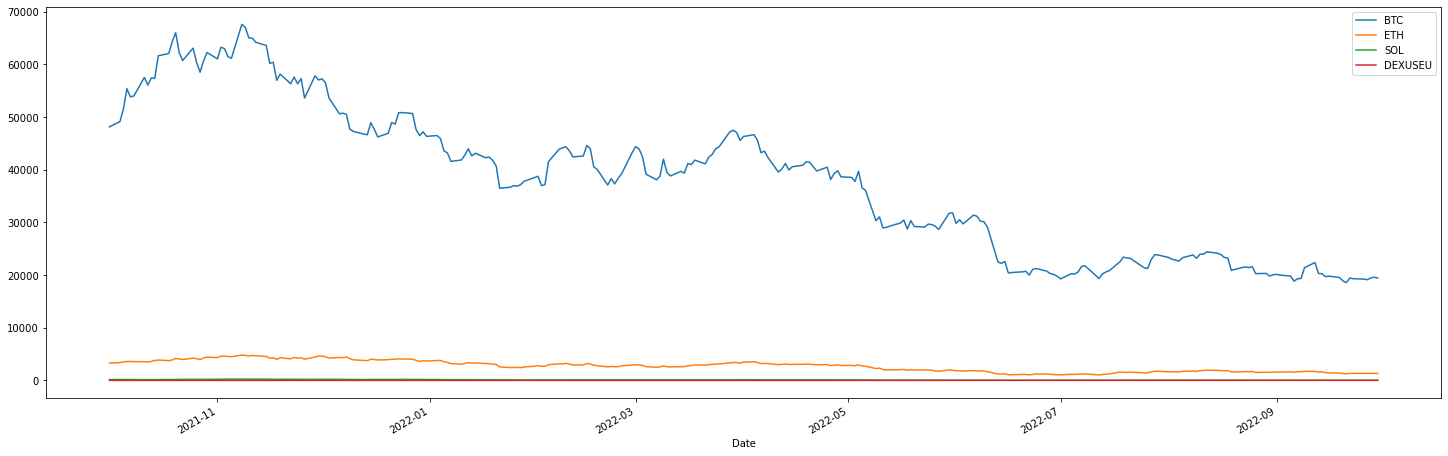

In [79]:
# Plot all currencies in the same graph
df.plot(x='Date',
        y=['BTC','ETH','SOL','DEXUSEU'],
        figsize=(25,8));

In [80]:
# Scale currencies using MinMaxScaler so that we can plot on the same graph
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['BTC','ETH','SOL','DEXUSEU']])
scaled_data

array([[0.01804162, 0.07678794, 0.02278918, 0.08071532],
       [0.02092334, 0.07882032, 0.02614854, 0.07636539],
       [0.01793819, 0.07928668, 0.02292537, 0.03141614],
       ...,
       [0.6725376 , 0.65723257, 0.61707826, 0.96326728],
       [0.62353846, 0.62055168, 0.62892682, 0.96955051],
       [0.6032208 , 0.60132224, 0.60600145, 0.9579507 ]])

In [81]:
# create a dataframe for plotting scaled data
df_scaled = pd.DataFrame(scaled_data).rename(columns={0:'BTC', 1:'ETH', 2:'SOL', 3:'DEXUSEU'})
df_scaled = df[['Date']].merge(df_scaled, left_index=True, right_index=True, how='inner')
df_scaled

,Date,BTC,ETH,SOL,DEXUSEU
0,2022-09-30,0.018,0.077,0.023,0.081
1,2022-09-29,0.021,0.079,0.026,0.076
2,2022-09-28,0.018,0.079,0.023,0.031
3,2022-09-27,0.011,0.077,0.021,0.000
4,2022-09-26,0.014,0.079,0.026,0.003
...,...,...,...,...,...
256,2021-10-07,0.719,0.676,0.572,0.940
257,2021-10-06,0.751,0.674,0.572,0.933
258,2021-10-05,0.673,0.657,0.617,0.963
259,2021-10-04,0.624,0.621,0.629,0.970


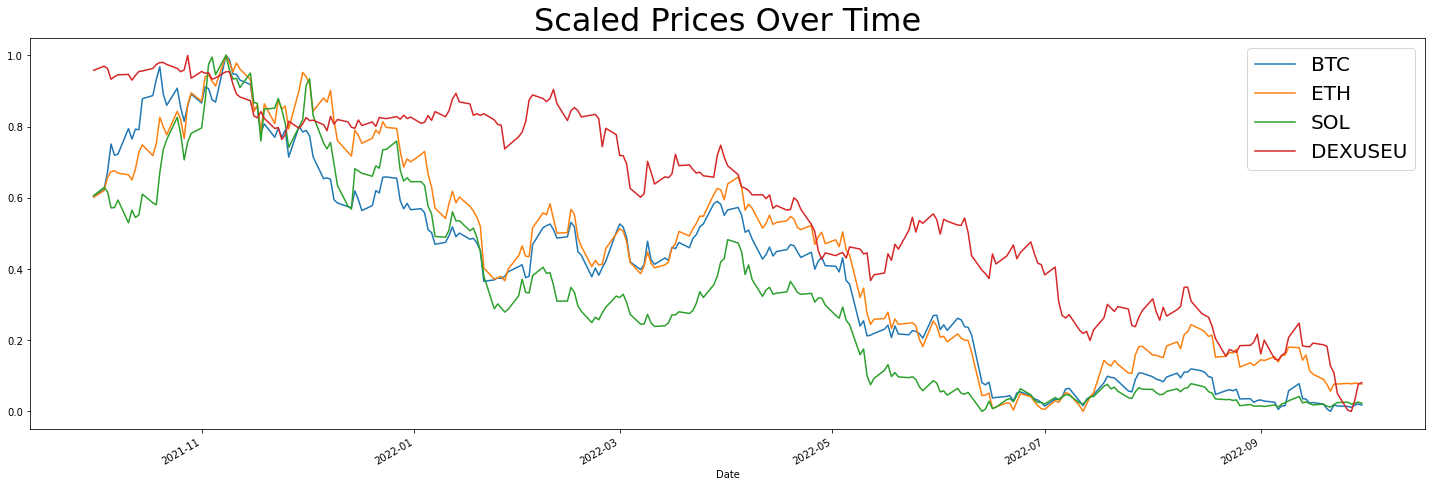

In [82]:
df_scaled.plot(x='Date',
               y=['BTC','ETH','SOL','DEXUSEU'],
               figsize=(25,8));

plt.title('Scaled Prices Over Time', fontsize=32);
plt.legend(fontsize=20);

In [83]:
# Calculate Day over Day Pct. Change in Prices
df['BTC_pct'] = (df['BTC'] - df.shift(-1)['BTC']) / df.shift(-1)['BTC']
df['ETH_pct'] = (df['ETH'] - df.shift(-1)['ETH']) / df.shift(-1)['ETH']
df['SOL_pct'] = (df['SOL'] - df.shift(-1)['SOL']) / df.shift(-1)['SOL']
df['DEXUSEU_pct'] = (df['DEXUSEU'] - df.shift(-1)['DEXUSEU']) / df.shift(-1)['DEXUSEU']
df

,Date,BTC,ETH,SOL,DEXUSEU,BTC_pct,ETH_pct,SOL_pct,DEXUSEU_pct
0,2022-09-30,19431.790,1327.980,33.210,0.978,-0.007,-0.006,-0.022,0.001
1,2022-09-29,19573.050,1335.650,33.950,0.977,0.008,-0.001,0.021,0.010
2,2022-09-28,19426.720,1337.410,33.240,0.968,0.017,0.005,0.015,0.007
3,2022-09-27,19110.550,1330.130,32.750,0.962,-0.006,-0.004,-0.033,-0.001
4,2022-09-26,19222.670,1335.320,33.880,0.962,-0.004,0.005,0.006,-0.010
...,...,...,...,...,...,...,...,...,...
256,2021-10-07,53805.990,3587.970,154.280,1.156,-0.028,0.002,0.001,0.001
257,2021-10-06,55361.450,3580.560,154.110,1.155,0.075,0.018,-0.061,-0.005
258,2021-10-05,51514.810,3518.520,164.120,1.161,0.049,0.041,-0.016,-0.001
259,2021-10-04,49112.900,3380.090,166.730,1.162,0.021,0.022,0.031,0.002


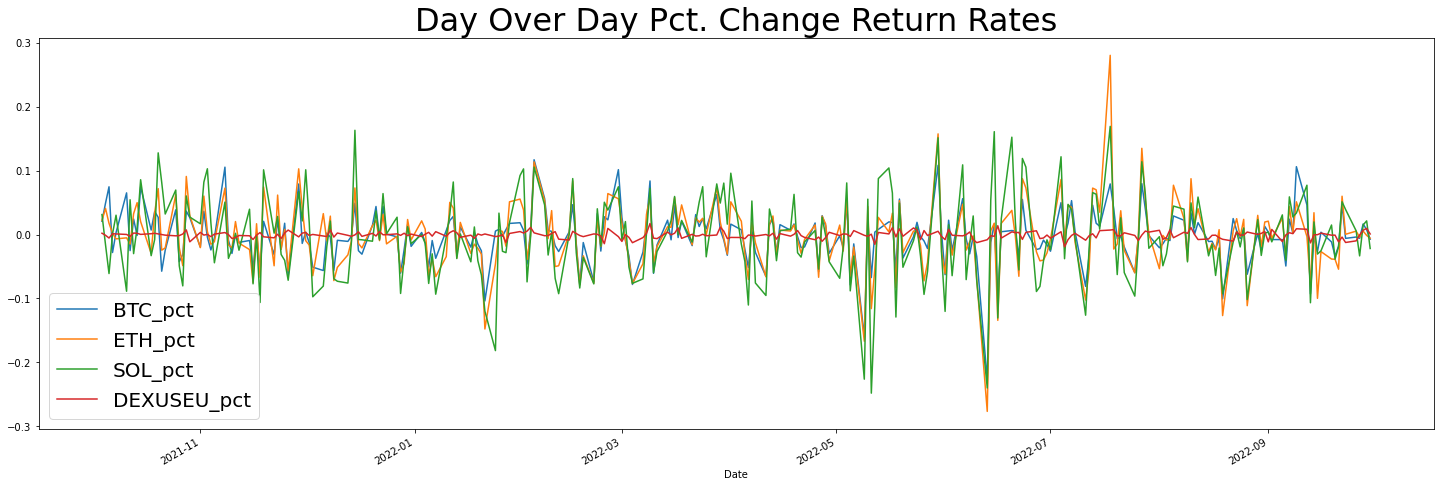

In [84]:
# Plot Daily Pct Price Changes for each Asset
df.plot(x='Date',
        y=['BTC_pct','ETH_pct','SOL_pct','DEXUSEU_pct'],
        figsize=(25,8));

plt.title('Day Over Day Pct. Change Return Rates', fontsize=32);
plt.legend(fontsize=20);

In [85]:
# Calculate Rolling 30-day Average Asset Price 
df['BTC_roll'] = df['BTC'].rolling(window=30).mean().shift(-29)
df['ETH_roll'] = df['ETH'].rolling(window=30).mean().shift(-29)
df['SOL_roll'] = df['SOL'].rolling(window=30).mean().shift(-29)
df['DEXUSEU_roll'] = df['DEXUSEU'].rolling(window=30).mean().shift(-29)
df

,Date,BTC,ETH,SOL,DEXUSEU,BTC_pct,ETH_pct,SOL_pct,DEXUSEU_pct,BTC_roll,ETH_roll,SOL_roll,DEXUSEU_roll
0,2022-09-30,19431.790,1327.980,33.210,0.978,-0.007,-0.006,-0.022,0.001,19997.203,1507.142,33.124,0.992
1,2022-09-29,19573.050,1335.650,33.950,0.977,0.008,-0.001,0.021,0.010,20045.395,1516.642,33.213,0.993
2,2022-09-28,19426.720,1337.410,33.240,0.968,0.017,0.005,0.015,0.007,20166.718,1533.687,33.400,0.994
3,2022-09-27,19110.550,1330.130,32.750,0.962,-0.006,-0.004,-0.033,-0.001,20297.027,1550.207,33.638,0.996
4,2022-09-26,19222.670,1335.320,33.880,0.962,-0.004,0.005,0.006,-0.010,20456.119,1568.474,33.985,0.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2021-10-07,53805.990,3587.970,154.280,1.156,-0.028,0.002,0.001,0.001,NaN,NaN,NaN,NaN
257,2021-10-06,55361.450,3580.560,154.110,1.155,0.075,0.018,-0.061,-0.005,NaN,NaN,NaN,NaN
258,2021-10-05,51514.810,3518.520,164.120,1.161,0.049,0.041,-0.016,-0.001,NaN,NaN,NaN,NaN
259,2021-10-04,49112.900,3380.090,166.730,1.162,0.021,0.022,0.031,0.002,NaN,NaN,NaN,NaN


In [86]:
# Calculate Pairwise Correlations between DEXUSEU and each Crypto
corr_matrix = df.corr()
corr_matrix

,BTC,ETH,SOL,DEXUSEU,BTC_pct,ETH_pct,SOL_pct,DEXUSEU_pct,BTC_roll,ETH_roll,SOL_roll,DEXUSEU_roll
BTC,1.000,0.970,0.948,0.903,0.089,0.081,0.074,0.028,0.954,0.921,0.900,0.914
ETH,0.970,1.000,0.971,0.859,0.065,0.078,0.063,0.039,0.942,0.931,0.923,0.855
SOL,0.948,0.971,1.000,0.842,0.040,0.057,0.068,0.026,0.940,0.923,0.948,0.842
DEXUSEU,0.903,0.859,0.842,1.000,0.053,0.031,0.024,0.089,0.883,0.871,0.860,0.967
BTC_pct,0.089,0.065,0.040,0.053,1.000,0.857,0.738,0.191,-0.062,-0.064,-0.052,-0.019
ETH_pct,0.081,0.078,0.057,0.031,0.857,1.000,0.818,0.193,-0.055,-0.073,-0.048,-0.016
SOL_pct,0.074,0.063,0.068,0.024,0.738,0.818,1.000,0.194,-0.062,-0.079,-0.067,-0.032
DEXUSEU_pct,0.028,0.039,0.026,0.089,0.191,0.193,0.194,1.000,0.022,0.035,0.041,0.009
BTC_roll,0.954,0.942,0.940,0.883,-0.062,-0.055,-0.062,0.022,1.000,0.982,0.963,0.921
ETH_roll,0.921,0.931,0.923,0.871,-0.064,-0.073,-0.079,0.035,0.982,1.000,0.979,0.890


In [87]:
# 30-day Rolling Mean Correlation between DEXUSEU and each Crypto
corr_matrix['DEXUSEU_roll'][['BTC_roll','ETH_roll','SOL_roll']]

BTC_roll   0.921
ETH_roll   0.890
SOL_roll   0.875
Name: DEXUSEU_roll, dtype: float64

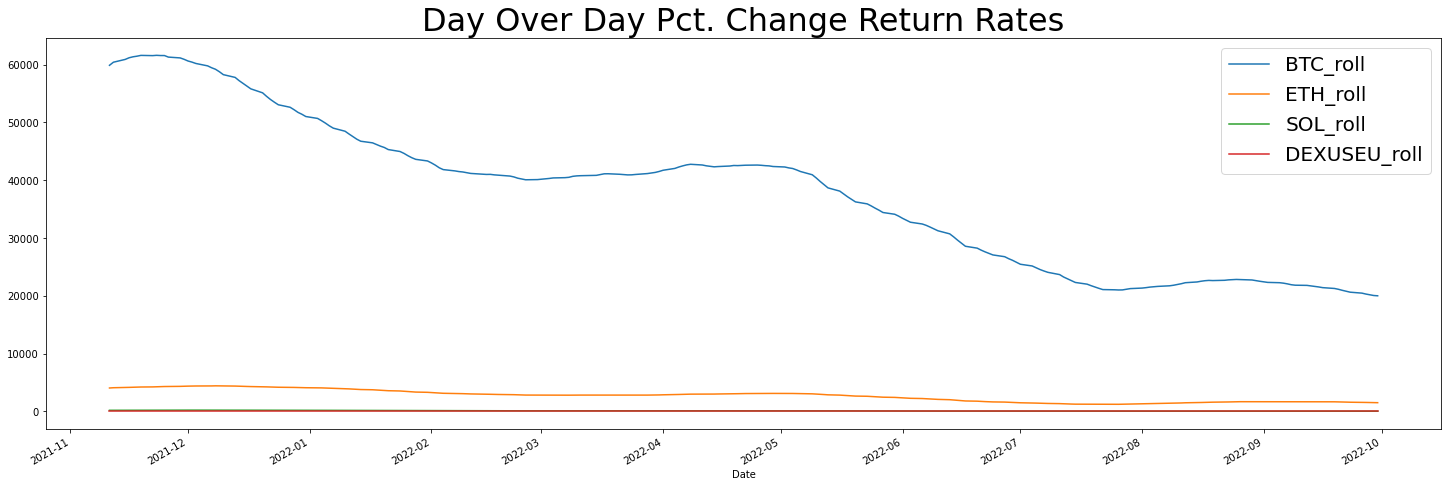

In [88]:
# Plot Rolling 30-day of each asset to understand co-movement
df.plot(x='Date',
        y=['BTC_roll','ETH_roll','SOL_roll','DEXUSEU_roll'],
        figsize=(25,8));

plt.title('Day Over Day Pct. Change Return Rates', fontsize=32);
plt.legend(fontsize=20);

In [89]:
# We have to scale the data first.
scaler = MinMaxScaler()
scaled_roll = scaler.fit_transform(df[['BTC_roll','ETH_roll','SOL_roll','DEXUSEU_roll']])
scaled_roll

array([[0.        , 0.09151798, 0.        , 0.        ],
       [0.0011587 , 0.09447874, 0.00048251, 0.00513345],
       [0.00407571, 0.09979087, 0.00149074, 0.01195131],
       ...,
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan]])

In [90]:
# create a dataframe for plotting scaled roll
df_scaled_roll = pd.DataFrame(scaled_roll).rename(columns={0:'BTC_roll', 1:'ETH_roll', 2:'SOL_roll', 3:'DEXUSEU_roll'})
df_scaled_roll = df[['Date']].merge(df_scaled_roll, left_index=True, right_index=True, how='inner')
df_scaled_roll

,Date,BTC_roll,ETH_roll,SOL_roll,DEXUSEU_roll
0,2022-09-30,0.000,0.092,0.000,0.000
1,2022-09-29,0.001,0.094,0.000,0.005
2,2022-09-28,0.004,0.100,0.001,0.012
3,2022-09-27,0.007,0.105,0.003,0.022
4,2022-09-26,0.011,0.111,0.005,0.033
...,...,...,...,...,...
256,2021-10-07,NaN,NaN,NaN,NaN
257,2021-10-06,NaN,NaN,NaN,NaN
258,2021-10-05,NaN,NaN,NaN,NaN
259,2021-10-04,NaN,NaN,NaN,NaN


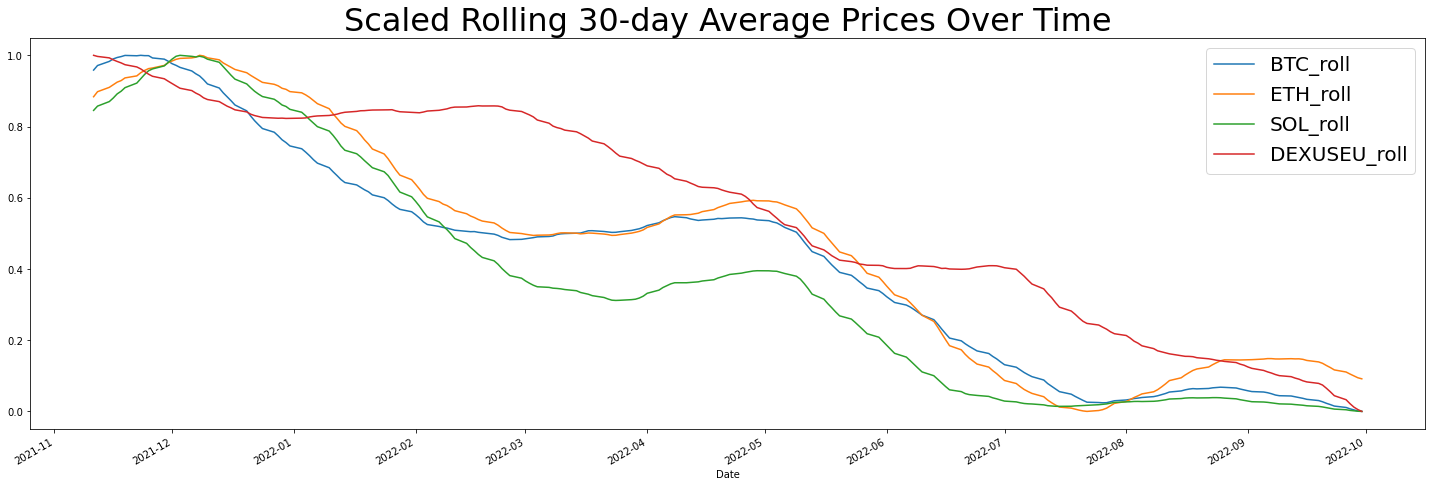

In [91]:
# Plot Scaled Rolling 30-Day average Prices
df_scaled_roll.plot(x='Date',
                    y=['BTC_roll','ETH_roll','SOL_roll','DEXUSEU_roll'],
               figsize=(25,8));

plt.title('Scaled Rolling 30-day Average Prices Over Time', fontsize=32);
plt.legend(fontsize=20);

In [92]:
# Calculate a Rolling 30-day correlation between DEXUSEU FIAT and each Cryptocurrency
df['DEXUSEU_BTC_corr'] = df['DEXUSEU'].rolling(30).corr(df['BTC']).shift(-29)
df['DEXUSEU_ETH_corr'] = df['DEXUSEU'].rolling(30).corr(df['ETH']).shift(-29)
df['DEXUSEU_SOL_corr'] = df['DEXUSEU'].rolling(30).corr(df['SOL']).shift(-29)
df

,Date,BTC,ETH,SOL,DEXUSEU,BTC_pct,ETH_pct,SOL_pct,DEXUSEU_pct,BTC_roll,ETH_roll,SOL_roll,DEXUSEU_roll,DEXUSEU_BTC_corr,DEXUSEU_ETH_corr,DEXUSEU_SOL_corr
0,2022-09-30,19431.790,1327.980,33.210,0.978,-0.007,-0.006,-0.022,0.001,19997.203,1507.142,33.124,0.992,0.510,0.664,0.043
1,2022-09-29,19573.050,1335.650,33.950,0.977,0.008,-0.001,0.021,0.010,20045.395,1516.642,33.213,0.993,0.513,0.654,0.091
2,2022-09-28,19426.720,1337.410,33.240,0.968,0.017,0.005,0.015,0.007,20166.718,1533.687,33.400,0.994,0.549,0.662,0.233
3,2022-09-27,19110.550,1330.130,32.750,0.962,-0.006,-0.004,-0.033,-0.001,20297.027,1550.207,33.638,0.996,0.604,0.672,0.362
4,2022-09-26,19222.670,1335.320,33.880,0.962,-0.004,0.005,0.006,-0.010,20456.119,1568.474,33.985,0.998,0.659,0.689,0.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2021-10-07,53805.990,3587.970,154.280,1.156,-0.028,0.002,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2021-10-06,55361.450,3580.560,154.110,1.155,0.075,0.018,-0.061,-0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,2021-10-05,51514.810,3518.520,164.120,1.161,0.049,0.041,-0.016,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,2021-10-04,49112.900,3380.090,166.730,1.162,0.021,0.022,0.031,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN


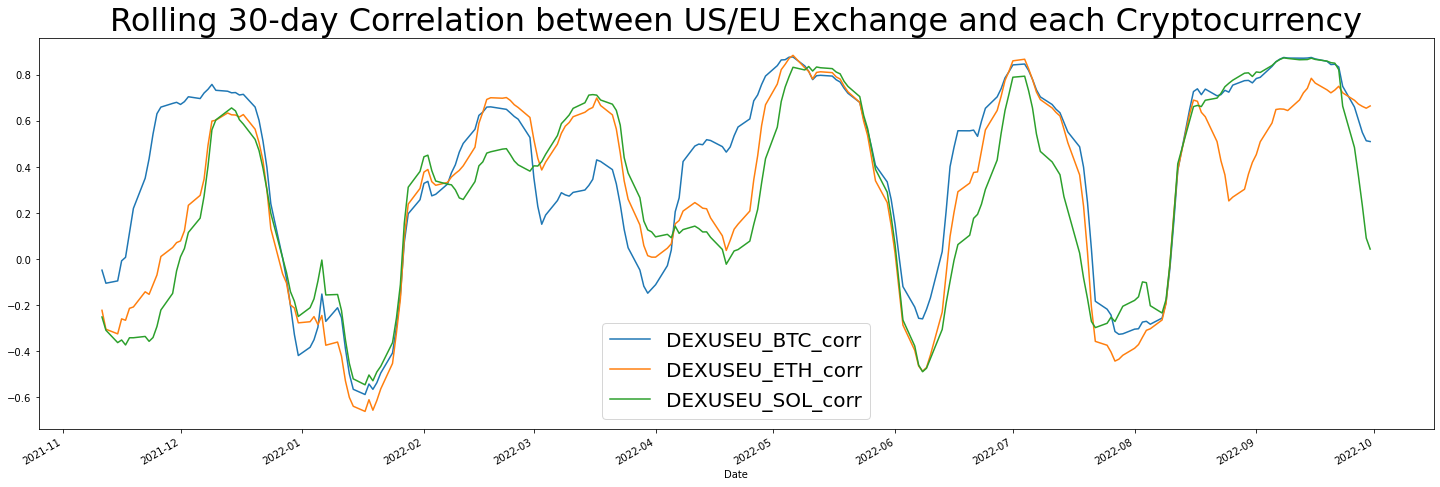

In [93]:
# Plot the Rolling 30-day Correlations found Above
df.plot(x='Date',
        y=['DEXUSEU_BTC_corr','DEXUSEU_ETH_corr','DEXUSEU_SOL_corr'],
        figsize=(25,8));

plt.title("Rolling 30-day Correlation between US/EU Exchange and each Cryptocurrency", fontsize=32);
plt.legend(fontsize=20, loc='best');

In [94]:
# Calculate Rolling 30-day Standard Deviation of each Asset's Daily Returns
df['BTC_stdev'] = df['BTC_pct'].rolling(window=30).std().shift(-29)
df['ETH_stdev'] = df['ETH_pct'].rolling(window=30).std().shift(-29)
df['SOL_stdev'] = df['SOL_pct'].rolling(window=30).std().shift(-29)
df['DEXUSEU_stdev'] = df['DEXUSEU_pct'].rolling(window=30).std().shift(-29)
df

,Date,BTC,ETH,SOL,DEXUSEU,BTC_pct,ETH_pct,SOL_pct,DEXUSEU_pct,BTC_roll,ETH_roll,SOL_roll,DEXUSEU_roll,DEXUSEU_BTC_corr,DEXUSEU_ETH_corr,DEXUSEU_SOL_corr,BTC_stdev,ETH_stdev,SOL_stdev,DEXUSEU_stdev
0,2022-09-30,19431.790,1327.980,33.210,0.978,-0.007,-0.006,-0.022,0.001,19997.203,1507.142,33.124,0.992,0.510,0.664,0.043,0.035,0.041,0.041,0.007
1,2022-09-29,19573.050,1335.650,33.950,0.977,0.008,-0.001,0.021,0.010,20045.395,1516.642,33.213,0.993,0.513,0.654,0.091,0.039,0.047,0.044,0.007
2,2022-09-28,19426.720,1337.410,33.240,0.968,0.017,0.005,0.015,0.007,20166.718,1533.687,33.400,0.994,0.549,0.662,0.233,0.039,0.047,0.044,0.007
3,2022-09-27,19110.550,1330.130,32.750,0.962,-0.006,-0.004,-0.033,-0.001,20297.027,1550.207,33.638,0.996,0.604,0.672,0.362,0.039,0.047,0.045,0.006
4,2022-09-26,19222.670,1335.320,33.880,0.962,-0.004,0.005,0.006,-0.010,20456.119,1568.474,33.985,0.998,0.659,0.689,0.484,0.039,0.047,0.045,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2021-10-07,53805.990,3587.970,154.280,1.156,-0.028,0.002,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2021-10-06,55361.450,3580.560,154.110,1.155,0.075,0.018,-0.061,-0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,2021-10-05,51514.810,3518.520,164.120,1.161,0.049,0.041,-0.016,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,2021-10-04,49112.900,3380.090,166.730,1.162,0.021,0.022,0.031,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


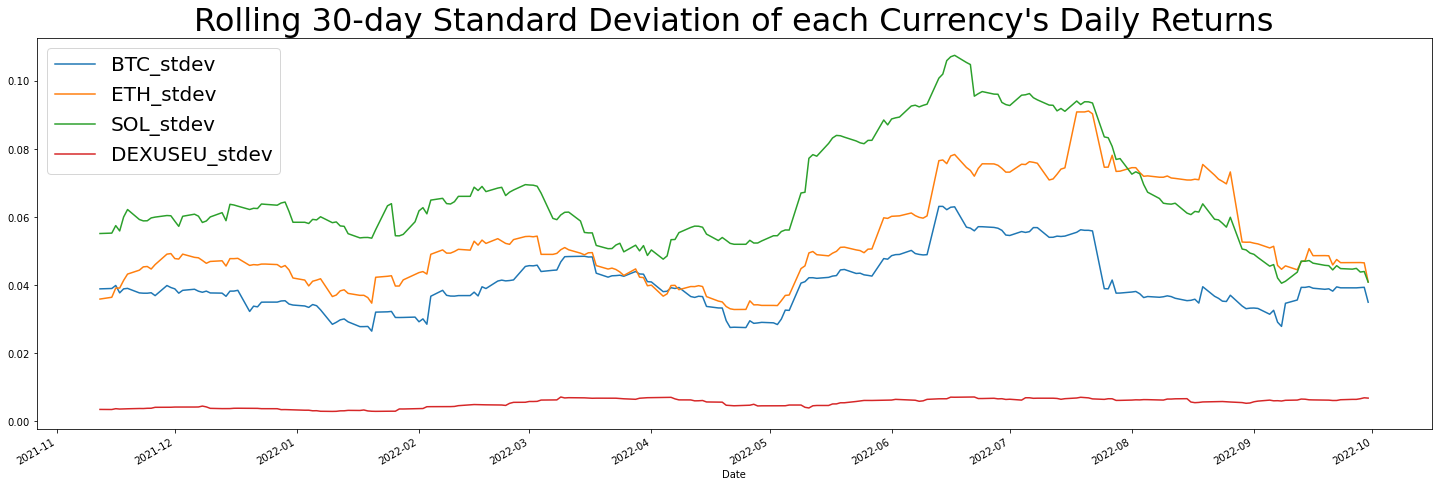

In [95]:
# Plot the Rolling 30-day Standard Deviation of each Asset's Daily Returns
df.plot(x='Date',
        y=['BTC_stdev','ETH_stdev','SOL_stdev','DEXUSEU_stdev'],
        figsize=(25,8));

plt.title("Rolling 30-day Standard Deviation of each Currency's Daily Returns", fontsize=32);
plt.legend(fontsize=20);

In [2]:
# Load json file with global crypto locations/venues
locations = open("coinmap_locations.json", encoding='utf-8')
locations = json.load(locations)
locations

{'venues': [{'id': 8225,
   'lat': 50.12206394999416,
   'lon': -5.532898306846619,
   'category': 'atm',
   'name': 'One And All',
   'created_on': 1465943680,
   'geolocation_degrees': '5°31\'58.43"W, 50°7\'19.43"N'},
  {'id': 385385,
   'lat': 32.06053685715676,
   'lon': 34.77253317832947,
   'category': 'cafe',
   'name': 'Agua tierra',
   'created_on': 1634110332,
   'geolocation_degrees': '34°46\'21.12"E, 32°3\'37.93"N'},
  {'id': 15,
   'lat': 48.4377466,
   'lon': -123.3124115,
   'category': 'grocery',
   'name': 'Slaters Meats',
   'created_on': 1394219130,
   'geolocation_degrees': '123°18\'44.68"W, 48°26\'15.89"N'},
  {'id': 33,
   'lat': 50.0658333,
   'lon': 14.3588965,
   'category': 'default',
   'name': 'kaktusy eshop',
   'created_on': 1422120857,
   'geolocation_degrees': '14°21\'32.03"E, 50°3\'57.0"N'},
  {'id': 295715,
   'lat': 47.049920232454696,
   'lon': 8.308196067810059,
   'category': 'default',
   'name': 'Fuchs Hairteam',
   'created_on': 1629268398,
   '

In [15]:
# Save to a Pandas DataFrame
crypto_locs = pd.json_normalize(locations, record_path=['venues'])
crypto_locs

,id,lat,lon,category,name,created_on,geolocation_degrees,promoted
0,8225,50.122064,-5.532898,atm,One And All,1465943680,"5°31'58.43""W, 50°7'19.43""N",NaN
1,385385,32.060537,34.772533,cafe,Agua tierra,1634110332,"34°46'21.12""E, 32°3'37.93""N",NaN
2,15,48.437747,-123.312411,grocery,Slaters Meats,1394219130,"123°18'44.68""W, 48°26'15.89""N",NaN
3,33,50.065833,14.358897,default,kaktusy eshop,1422120857,"14°21'32.03""E, 50°3'57.0""N",NaN
4,295715,47.049920,8.308196,default,Fuchs Hairteam,1629268398,"8°18'29.51""E, 47°2'59.71""N",NaN
...,...,...,...,...,...,...,...,...
30011,40932,41.630589,-83.574792,atm,Stop & Go,1614241648,"83°34'29.25""W, 41°37'50.12""N",True
30012,190604,41.628157,-83.503584,atm,Sunoco Gas Station,1623158685,"83°30'12.9""W, 41°37'41.37""N",True
30013,25155,39.816636,-74.981342,atm,Super 7 Store,1612977474,"74°58'52.83""W, 39°48'59.89""N",True
30014,25162,39.889454,-75.120172,atm,Super Lucky 7 Deli & Convenience,1612977477,"75°7'12.62""W, 39°53'22.04""N",True


In [66]:
# Convert Unix Epoch to DateTime
crypto_locs['site_date'] = pd.to_datetime(crypto_locs['created_on'], unit='s')

# Extract Year and Week so we can aggregate to this level
crypto_locs['year'] = crypto_locs['site_date'].dt.year
crypto_locs['week'] = crypto_locs['site_date'].dt.isocalendar().week

crypto_locs

,id,lat,lon,category,name,created_on,geolocation_degrees,promoted,site_date,week,year
0,8225,50.122064,-5.532898,atm,One And All,1465943680,"5°31'58.43""W, 50°7'19.43""N",NaN,2016-06-14 22:34:40,24,2016
1,385385,32.060537,34.772533,cafe,Agua tierra,1634110332,"34°46'21.12""E, 32°3'37.93""N",NaN,2021-10-13 07:32:12,41,2021
2,15,48.437747,-123.312411,grocery,Slaters Meats,1394219130,"123°18'44.68""W, 48°26'15.89""N",NaN,2014-03-07 19:05:30,10,2014
3,33,50.065833,14.358897,default,kaktusy eshop,1422120857,"14°21'32.03""E, 50°3'57.0""N",NaN,2015-01-24 17:34:17,4,2015
4,295715,47.049920,8.308196,default,Fuchs Hairteam,1629268398,"8°18'29.51""E, 47°2'59.71""N",NaN,2021-08-18 06:33:18,33,2021
...,...,...,...,...,...,...,...,...,...,...,...
30011,40932,41.630589,-83.574792,atm,Stop & Go,1614241648,"83°34'29.25""W, 41°37'50.12""N",True,2021-02-25 08:27:28,8,2021
30012,190604,41.628157,-83.503584,atm,Sunoco Gas Station,1623158685,"83°30'12.9""W, 41°37'41.37""N",True,2021-06-08 13:24:45,23,2021
30013,25155,39.816636,-74.981342,atm,Super 7 Store,1612977474,"74°58'52.83""W, 39°48'59.89""N",True,2021-02-10 17:17:54,6,2021
30014,25162,39.889454,-75.120172,atm,Super Lucky 7 Deli & Convenience,1612977477,"75°7'12.62""W, 39°53'22.04""N",True,2021-02-10 17:17:57,6,2021


In [54]:
# Aggregate data to the year and week level
crypto_locs_summary = crypto_locs.groupby(['year', 'week']).size().reset_index().rename(columns={0:'count'})

# Create a new label column called year-week to be used for plotting
crypto_locs_summary['year-week'] = crypto_locs_summary['year'].astype(str)+'-'+crypto_locs_summary['week'].astype(str)

# Create a column that keeps track of the cumulative sum of open locations
crypto_locs_summary['cumulative_locs'] = np.cumsum(crypto_locs_summary['count'])

crypto_locs_summary

,year,week,count,year-week,cumulative_locs
0,2013,1,65,2013-1,65
1,2013,9,2,2013-9,67
2,2013,10,1,2013-10,68
3,2013,15,8,2013-15,76
4,2013,16,13,2013-16,89
...,...,...,...,...,...
495,2022,37,14,2022-37,29956
496,2022,38,9,2022-38,29965
497,2022,39,23,2022-39,29988
498,2022,40,27,2022-40,30015


No handles with labels found to put in legend.


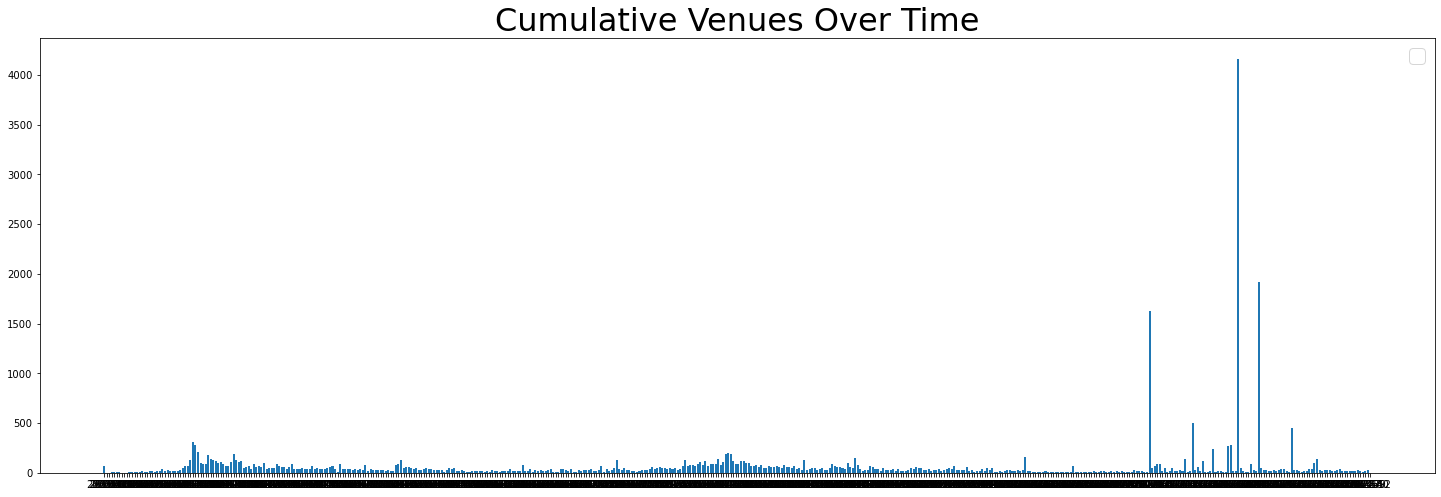

In [64]:
# Plot the cumulative Crypto Locations/Venues over Time
fig = plt.figure(figsize=(25,8))
plt.bar(crypto_locs_summary['year-week'], crypto_locs_summary['count'])
plt.title('Cumulative Venues Over Time', fontsize=32);
plt.legend(fontsize=20);
plt.show();

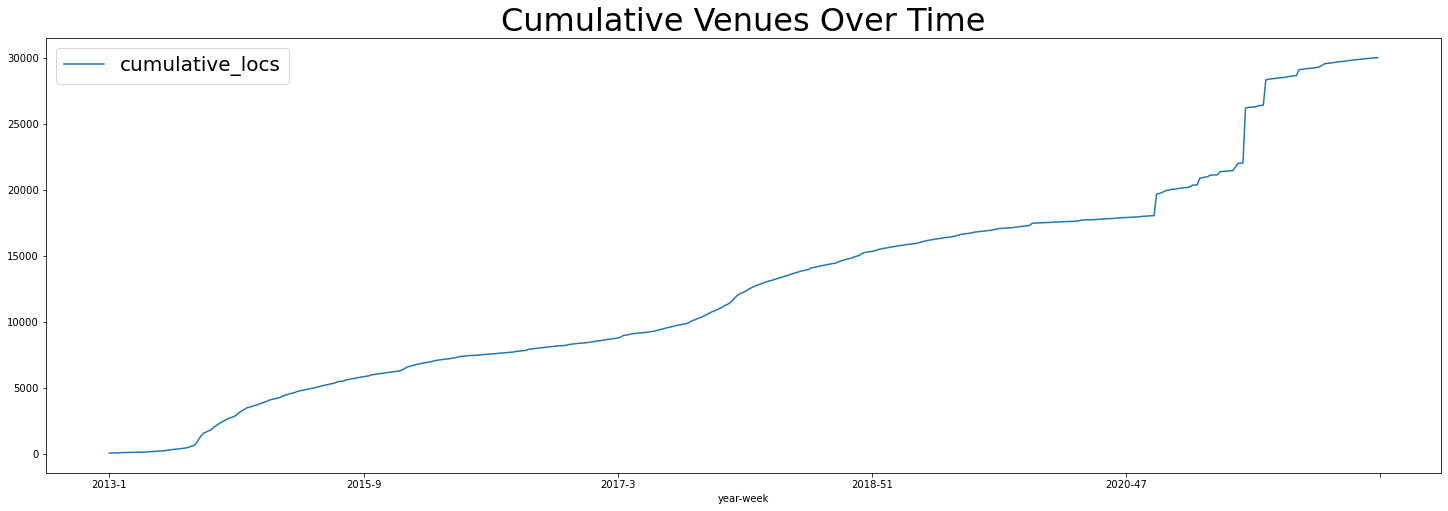

In [56]:
# Plot the cumulative Crypto Locations/Venues over Time
crypto_locs_summary.plot(x='year-week',
                         y='cumulative_locs',                        
                         figsize=(25,8));

plt.title('Cumulative Venues Over Time', fontsize=32);
plt.legend(fontsize=20);

In [69]:
# Export to excel for prettier chart
crypto_locs[['id','site_date','year','week']].to_clipboard(index=False)

In [97]:
# Create a Year and Week column in our Currencies dataframe so that we can compare to the Crypto_Locs df
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.isocalendar().week
df

,Date,BTC,ETH,SOL,DEXUSEU,BTC_pct,ETH_pct,SOL_pct,DEXUSEU_pct,BTC_roll,ETH_roll,SOL_roll,DEXUSEU_roll,DEXUSEU_BTC_corr,DEXUSEU_ETH_corr,DEXUSEU_SOL_corr,BTC_stdev,ETH_stdev,SOL_stdev,DEXUSEU_stdev,year,week
0,2022-09-30,19431.790,1327.980,33.210,0.978,-0.007,-0.006,-0.022,0.001,19997.203,1507.142,33.124,0.992,0.510,0.664,0.043,0.035,0.041,0.041,0.007,2022,39
1,2022-09-29,19573.050,1335.650,33.950,0.977,0.008,-0.001,0.021,0.010,20045.395,1516.642,33.213,0.993,0.513,0.654,0.091,0.039,0.047,0.044,0.007,2022,39
2,2022-09-28,19426.720,1337.410,33.240,0.968,0.017,0.005,0.015,0.007,20166.718,1533.687,33.400,0.994,0.549,0.662,0.233,0.039,0.047,0.044,0.007,2022,39
3,2022-09-27,19110.550,1330.130,32.750,0.962,-0.006,-0.004,-0.033,-0.001,20297.027,1550.207,33.638,0.996,0.604,0.672,0.362,0.039,0.047,0.045,0.006,2022,39
4,2022-09-26,19222.670,1335.320,33.880,0.962,-0.004,0.005,0.006,-0.010,20456.119,1568.474,33.985,0.998,0.659,0.689,0.484,0.039,0.047,0.045,0.006,2022,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,2021-10-07,53805.990,3587.970,154.280,1.156,-0.028,0.002,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,40
257,2021-10-06,55361.450,3580.560,154.110,1.155,0.075,0.018,-0.061,-0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,40
258,2021-10-05,51514.810,3518.520,164.120,1.161,0.049,0.041,-0.016,-0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,40
259,2021-10-04,49112.900,3380.090,166.730,1.162,0.021,0.022,0.031,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,40


In [102]:
# Get Average Bitcoin price by week for the period we have
BTC_WK_Avg = df.groupby(['year', 'week']).BTC.mean().reset_index().rename(columns={'BTC':'BTC_WK_Avg_Price'})
BTC_WK_Avg

,year,week,BTC_WK_Avg_Price
0,2021,39,48116.940
1,2021,40,52752.600
2,2021,41,57968.486
3,2021,42,63036.668
4,2021,43,60947.222
5,2021,44,61955.752
6,2021,45,65727.958
7,2021,46,59829.770
8,2021,47,56196.646
9,2021,48,56423.580


In [108]:
BTC_Weekly_Locs_Price = crypto_locs_summary.merge(BTC_WK_Avg, how='left', on=['year','week'])
BTC_Weekly_Locs_Price.to_clipboard(index=False)
BTC_Weekly_Locs_Price

,year,week,count,year-week,cumulative_locs,BTC_WK_Avg_Price
0,2013,1,65,2013-1,65,NaN
1,2013,9,2,2013-9,67,NaN
2,2013,10,1,2013-10,68,NaN
3,2013,15,8,2013-15,76,NaN
4,2013,16,13,2013-16,89,NaN
...,...,...,...,...,...,...
495,2022,37,14,2022-37,29956,20476.408
496,2022,38,9,2022-38,29965,19138.702
497,2022,39,23,2022-39,29988,19352.956
498,2022,40,27,2022-40,30015,NaN


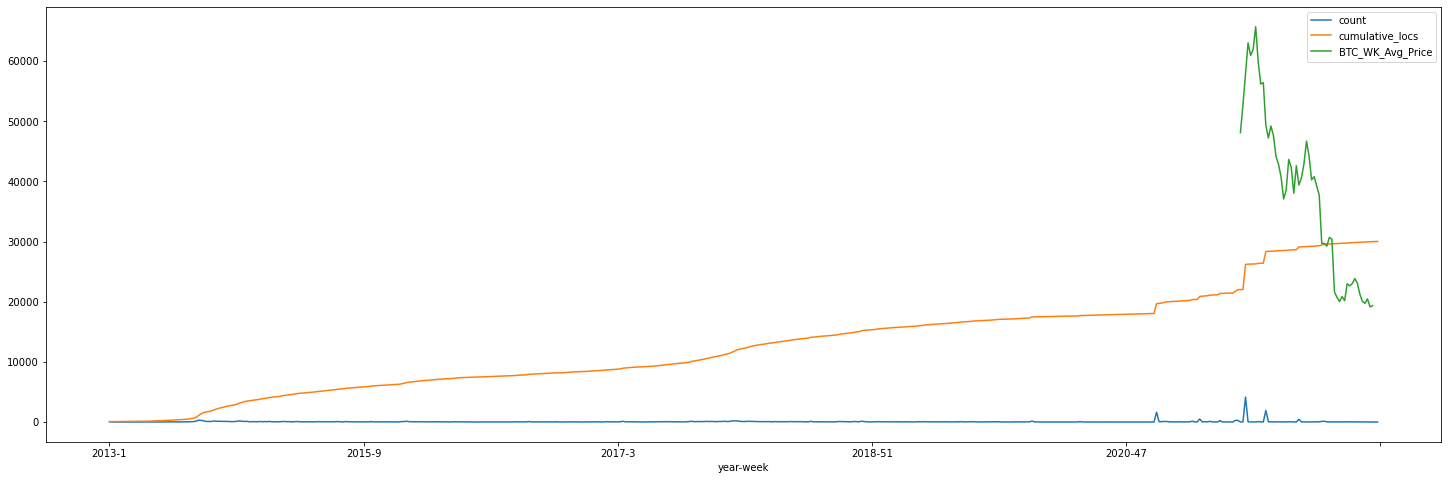

In [107]:
# Visualizing if there's any relationship between crypto venues opening and average price of Bitcoin by week
BTC_Weekly_Locs_Price.plot(x='year-week',
                           y=['count','cumulative_locs','BTC_WK_Avg_Price'],
                           figsize=(25,8));